https://www.techtrekking.com/getting-started-with-time-series-forecasting-with-prophet/

Using fb prophet for time-series forecasting

In [3]:
# Importing datasets
import pandas as pd
import numpy as np
from fbprophet import Prophet
# Read train and test
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
visitors = pd.read_csv("ppl_visit.csv" )

In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
ds    90 non-null object
y     90 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [6]:
pd.to_datetime(visitors['ds'], format='%Y-%m-%d')

0    2017-12-01
1    2017-12-02
2    2017-12-03
3    2017-12-04
4    2017-12-05
5    2017-12-06
6    2017-12-07
7    2017-12-08
8    2017-12-09
9    2017-12-10
10   2017-12-11
11   2017-12-12
12   2017-12-13
13   2017-12-14
14   2017-12-15
15   2017-12-16
16   2017-12-17
17   2017-12-18
18   2017-12-19
19   2017-12-20
20   2017-12-21
21   2017-12-22
22   2017-12-23
23   2017-12-24
24   2017-12-25
25   2017-12-26
26   2017-12-27
27   2017-12-28
28   2017-12-29
29   2017-12-30
        ...    
60   2018-01-30
61   2018-01-31
62   2018-02-01
63   2018-02-02
64   2018-02-03
65   2018-02-04
66   2018-02-05
67   2018-02-06
68   2018-02-07
69   2018-02-08
70   2018-02-09
71   2018-02-10
72   2018-02-11
73   2018-02-12
74   2018-02-13
75   2018-02-14
76   2018-02-15
77   2018-02-16
78   2018-02-17
79   2018-02-18
80   2018-02-19
81   2018-02-20
82   2018-02-21
83   2018-02-22
84   2018-02-23
85   2018-02-24
86   2018-02-25
87   2018-02-26
88   2018-02-27
89   2018-02-28
Name: ds, Length: 90, dt

In [7]:
visitors

,ds,y
0,2017-12-01,184439
1,2017-12-02,216527
2,2017-12-03,160727
3,2017-12-04,125297
4,2017-12-05,128117
5,2017-12-06,132590
6,2017-12-07,137210
7,2017-12-08,170921
8,2017-12-09,217437
9,2017-12-10,176270


In [8]:
m = Prophet()
m.fit(visitors)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
print("type of m" , type(m))

type of m <class 'fbprophet.forecaster.Prophet'>


In [10]:
### Extending data to few future dates
future = m.make_future_dataframe(periods=60)
print("type of future" , type(future))

type of future <class 'pandas.core.frame.DataFrame'>


In [11]:
### The predict method will assign each row in future a predicted value which it names yhat
forecast = m.predict(future)
print("type of forecast" , type(future))
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

type of forecast <class 'pandas.core.frame.DataFrame'>


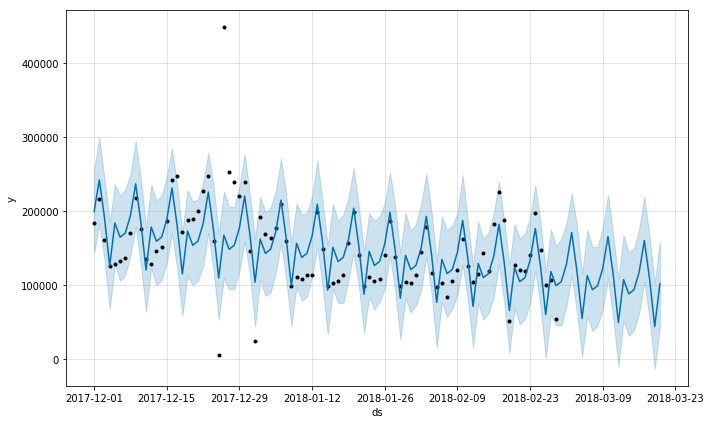

In [12]:
### Plotting forecast
fig1 = m.plot(forecast)
# fig1.show()
fig1.savefig('01_fbprophet_getting_started-01.png')

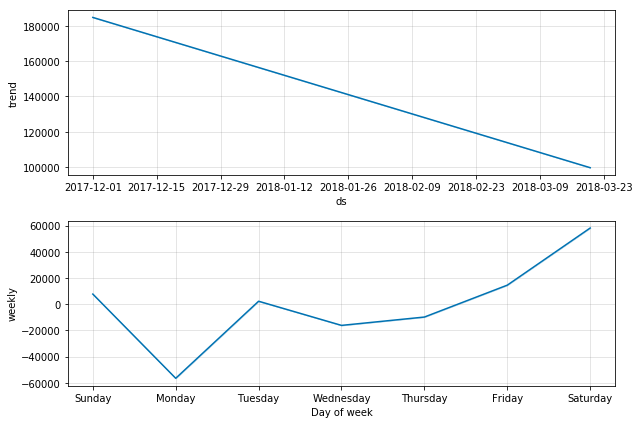

In [13]:
### Plotting forecast components
fig2 = m.plot_components(forecast)
fig2.savefig('01_fbprophet_getting_started-02.png')

In [14]:
### Saving output excel
forecast.to_csv('example_2.csv', sep=',')

In [16]:
print('*** Program Completed ***')

*** Program Completed ***


In [17]:
by_date.head()

,dateok,dwell00,date_to_format,date
0,2017-12-01 20:01:20,10,2017-12-01 20:01:20,2017-12-01
1,2017-12-01 20:01:40,2,2017-12-01 20:01:40,2017-12-01
2,2017-12-01 20:02:20,0,2017-12-01 20:02:20,2017-12-01
3,2017-12-01 20:02:50,2,2017-12-01 20:02:50,2017-12-01
4,2017-12-01 20:03:30,1,2017-12-01 20:03:30,2017-12-01


In [18]:
# I think I want to group by date, time and STORE/OTHER time for dwell00
by_date_dwell00 = cust_journey.groupby(['dateok'], as_index = False)[['dwell00']].sum()
# even adding the list of lists did not yield df
#by_hour = cust_journey.groupby('hour').mean()

NameError: name 'cust_journey' is not defined

In [ ]:
type(by_date_dwell00)

In [ ]:
by_date_dwell00['date'] = by_date_dwell00.dateok.dt.date
by_date_dwell00['y'] = by_date_dwell00.dateok.dt.date

In [ ]:
by_date_dwell00.drop('dateok', axis=1, inplace=True)

In [ ]:
reorder_by_date_dwell00 = by_date_dwell00[['date', 'dwell00']]

In [ ]:
reorder_by_date_dwell00

In [ ]:
reorder_by_date_dwell00.rename(columns={'date': 'ds', 'dwell00': 'y'})

In [ ]:
df = reorder_by_date_dwell00.reset_index().rename(columns={'ds':'ds', 'y':'y'})

In [ ]:
df.index.dtype

In [ ]:
# let's start with prophet now
m = Prophet()
m.fit(df)

In [ ]:
by_date.to_csv("by_date.csv", index = True)

In [ ]:
# extract just two cols for now and reset the date as it was the index
by_date_dwell00 = by_date[['dwell00']]
by_date_dwell00.reset_index(inplace=True)

In [ ]:
by_date_dwell00.rename(columns={'Date': 'DS', 'dwell00': 'Y'})

In [ ]:
df = pd.DataFrame([by_date_dwell00])

In [ ]:
df.dtypes()

In [ ]:
# transpose experiment - doesn't help for prophet
by_dwell = by_date.transpose()
by_dwell

In [ ]:
cust_journey['dateok'] = pd.to_datetime(cust_journey.Date,format='%Y-%m-%d %H:%M:%S')

In [ ]:
cust_journey['hour'] = cust_journey.hod

In [ ]:
# Calculate average hourly fraction
hourly_frac = cust_journey.groupby(['hour']).mean()/np.sum(cust_journey.groupby(['hour']).mean())

In [ ]:
cust_journey.head()

In [ ]:
hourly_frac[10:]